In [365]:
# uploading two datasets

from google.colab import files
a=files.upload()
b=files.upload()

Saving Customer_DF (1).csv to Customer_DF (1) (1).csv


Saving cust_transaction_details (1)(1).csv to cust_transaction_details (1)(1) (1).csv


In [0]:
# import all required modules

import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np
import seaborn as sns

In [0]:
df1=pd.read_csv(io.BytesIO(a["Customer_DF (1).csv"]))
df2=pd.read_csv(io.BytesIO(b["cust_transaction_details (1)(1).csv"]))

In [0]:
# merge two datasets
# in df3 dataframe

df3=pd.merge(df2,df1,on="customerEmail")

***
**DATA ANALYSIS**
***

In [369]:
df3.columns

Index(['Unnamed: 0_x', 'customerEmail', 'transactionId', 'orderId',
       'paymentMethodId', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'transactionAmount',
       'transactionFailed', 'orderState', 'Unnamed: 0_y', 'customerPhone',
       'customerDevice', 'customerIPAddress', 'customerBillingAddress',
       'No_Transactions', 'No_Orders', 'No_Payments', 'Fraud'],
      dtype='object')

In [370]:
df3.head()

,Unnamed: 0_x,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Unnamed: 0_y,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True


In [371]:
df3.tail()

,Unnamed: 0_x,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Unnamed: 0_y,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
814,618,dawn05@tucker-brown.com,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled,167,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False
815,619,dawn05@tucker-brown.com,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled,167,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False
816,620,dawn05@tucker-brown.com,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled,167,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False
817,621,dawn05@tucker-brown.com,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled,167,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False
818,622,dawn05@tucker-brown.com,wgmajf82,5lmvrj,f0xnu5om9,0,card,JCB 16 digit,27,0,fulfilled,167,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False


In [372]:
df3.shape

(819, 20)

In [373]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 818
Data columns (total 20 columns):
Unnamed: 0_x                        819 non-null int64
customerEmail                       819 non-null object
transactionId                       819 non-null object
orderId                             819 non-null object
paymentMethodId                     819 non-null object
paymentMethodRegistrationFailure    819 non-null int64
paymentMethodType                   819 non-null object
paymentMethodProvider               819 non-null object
transactionAmount                   819 non-null int64
transactionFailed                   819 non-null int64
orderState                          819 non-null object
Unnamed: 0_y                        819 non-null int64
customerPhone                       819 non-null object
customerDevice                      819 non-null object
customerIPAddress                   819 non-null object
customerBillingAddress              819 non-null object
No_T

In [374]:
df3.describe()

,Unnamed: 0_x,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,Unnamed: 0_y,No_Transactions,No_Orders,No_Payments
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,310.683761,0.100122,35.147741,0.256410,85.655678,5.195360,3.808303,2.135531
std,190.195560,0.300346,19.640072,0.436918,50.682492,2.924214,1.866872,1.860001
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153.000000,0.000000,22.000000,0.000000,45.000000,3.000000,3.000000,1.000000
50%,284.000000,0.000000,34.000000,0.000000,80.000000,5.000000,4.000000,2.000000
75%,487.500000,0.000000,46.000000,1.000000,133.000000,7.000000,5.000000,3.000000
max,622.000000,1.000000,353.000000,1.000000,167.000000,15.000000,8.000000,15.000000


***
**DATA PREPARATION and VISUALIZATION**
***

In [375]:
# checking null values 
# if any in 
# dataframe

df3.isnull().sum()

Unnamed: 0_x                        0
customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
Unnamed: 0_y                        0
customerPhone                       0
customerDevice                      0
customerIPAddress                   0
customerBillingAddress              0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
dtype: int64

In [0]:
# removing non 
# essential columns

nonessential_columns=["customerEmail","transactionId","orderId","paymentMethodId","paymentMethodProvider","customerPhone","customerDevice","customerIPAddress","customerBillingAddress","Unnamed: 0_y","Unnamed: 0_x"]



In [0]:
for i in nonessential_columns:
  df3=df3.drop(columns=[i],axis=1)

In [378]:
df3.head()

,paymentMethodRegistrationFailure,paymentMethodType,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,Fraud
0,1,card,18,0,pending,2,2,1,False
1,1,card,26,0,fulfilled,2,2,1,False
2,0,bitcoin,45,0,fulfilled,3,3,7,True
3,0,bitcoin,23,0,fulfilled,3,3,7,True
4,1,bitcoin,43,1,fulfilled,3,3,7,True


In [0]:
# converting str values
# in dataframe 
# to int format



In [379]:
df3["paymentMethodType"].unique()

array(['card', 'bitcoin', 'apple pay', 'paypal'], dtype=object)

In [0]:
df3["paymentMethodType"]=df3["paymentMethodType"].apply(lambda x:0 if x =="card" else x )
df3["paymentMethodType"]=df3["paymentMethodType"].apply(lambda x:1 if x =="bitcoin" else x )
df3["paymentMethodType"]=df3["paymentMethodType"].apply(lambda x:2 if x =="apple pay" else x )
df3["paymentMethodType"]=df3["paymentMethodType"].apply(lambda x:3 if x =="paypal" else x )

In [381]:
df3["orderState"].unique()

array(['pending', 'fulfilled', 'failed'], dtype=object)

In [0]:
df3["orderState"]=df3["orderState"].apply(lambda x:0 if x=="pending" else x)
df3["orderState"]=df3["orderState"].apply(lambda x:1 if x=="fulfilled" else x)
df3["orderState"]=df3["orderState"].apply(lambda x:2 if x=="failed" else x)

In [383]:
df3["paymentMethodType"].unique()

array([0, 1, 2, 3])

In [0]:
# also converting 
# Fraud columns 
# with int values

In [0]:
df3["Fraud"]=df3["Fraud"].astype(int)

In [0]:
# new dataframe

df3.head()
a=df3


In [387]:
max(df3["transactionAmount"])

353

In [388]:
len(df3[df3["transactionAmount"]>100])

1

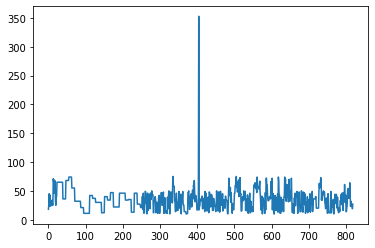

In [389]:
plt.plot(df3["transactionAmount"])

In [390]:
max(df3["transactionAmount"].iloc[300:534])

353

In [391]:
df3[400:410]

,paymentMethodRegistrationFailure,paymentMethodType,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,Fraud
400,0,0,17,1,1,5,2,3,0
401,0,0,17,1,1,5,2,3,0
402,0,0,17,1,1,5,2,3,0
403,0,0,33,0,2,5,2,3,0
404,0,0,353,1,1,1,1,1,1
405,0,0,17,0,1,8,5,2,0
406,1,0,24,1,1,8,5,2,0
407,0,0,24,0,1,8,5,2,0
408,1,0,35,0,0,8,5,2,0
409,1,0,32,0,1,8,5,2,0


In [0]:
# remove row no 404

df3=df3.drop([404],axis=0)

In [393]:
m=max(df3["transactionAmount"])
m

75

In [0]:
df3["transactionAmount"]=df3["transactionAmount"].apply(lambda x:x/m)

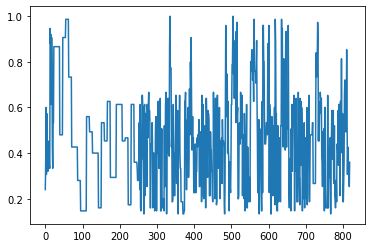

In [395]:
plt.plot(df3["transactionAmount"])

In [396]:

df3.head()

,paymentMethodRegistrationFailure,paymentMethodType,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,Fraud
0,1,0,0.240000,0,0,2,2,1,0
1,1,0,0.346667,0,1,2,2,1,0
2,0,1,0.600000,0,1,3,3,7,1
3,0,1,0.306667,0,1,3,3,7,1
4,1,1,0.573333,1,1,3,3,7,1


In [397]:
a=max(df3["No_Transactions"])
a

15

In [398]:
b=max(df3["No_Payments"])
b

15

In [399]:
c=max(df3["No_Orders"])
c

8

In [0]:
df3["No_Transactions"]=df3["No_Transactions"].apply(lambda x:x/a)
df3["No_Payments"]=df3["No_Payments"].apply(lambda x:x/b)
df3["No_Orders"]=df3["No_Orders"].apply(lambda x:x/c)

In [401]:
df3.head()

,paymentMethodRegistrationFailure,paymentMethodType,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,Fraud
0,1,0,0.240000,0,0,0.133333,0.250,0.066667,0
1,1,0,0.346667,0,1,0.133333,0.250,0.066667,0
2,0,1,0.600000,0,1,0.200000,0.375,0.466667,1
3,0,1,0.306667,0,1,0.200000,0.375,0.466667,1
4,1,1,0.573333,1,1,0.200000,0.375,0.466667,1


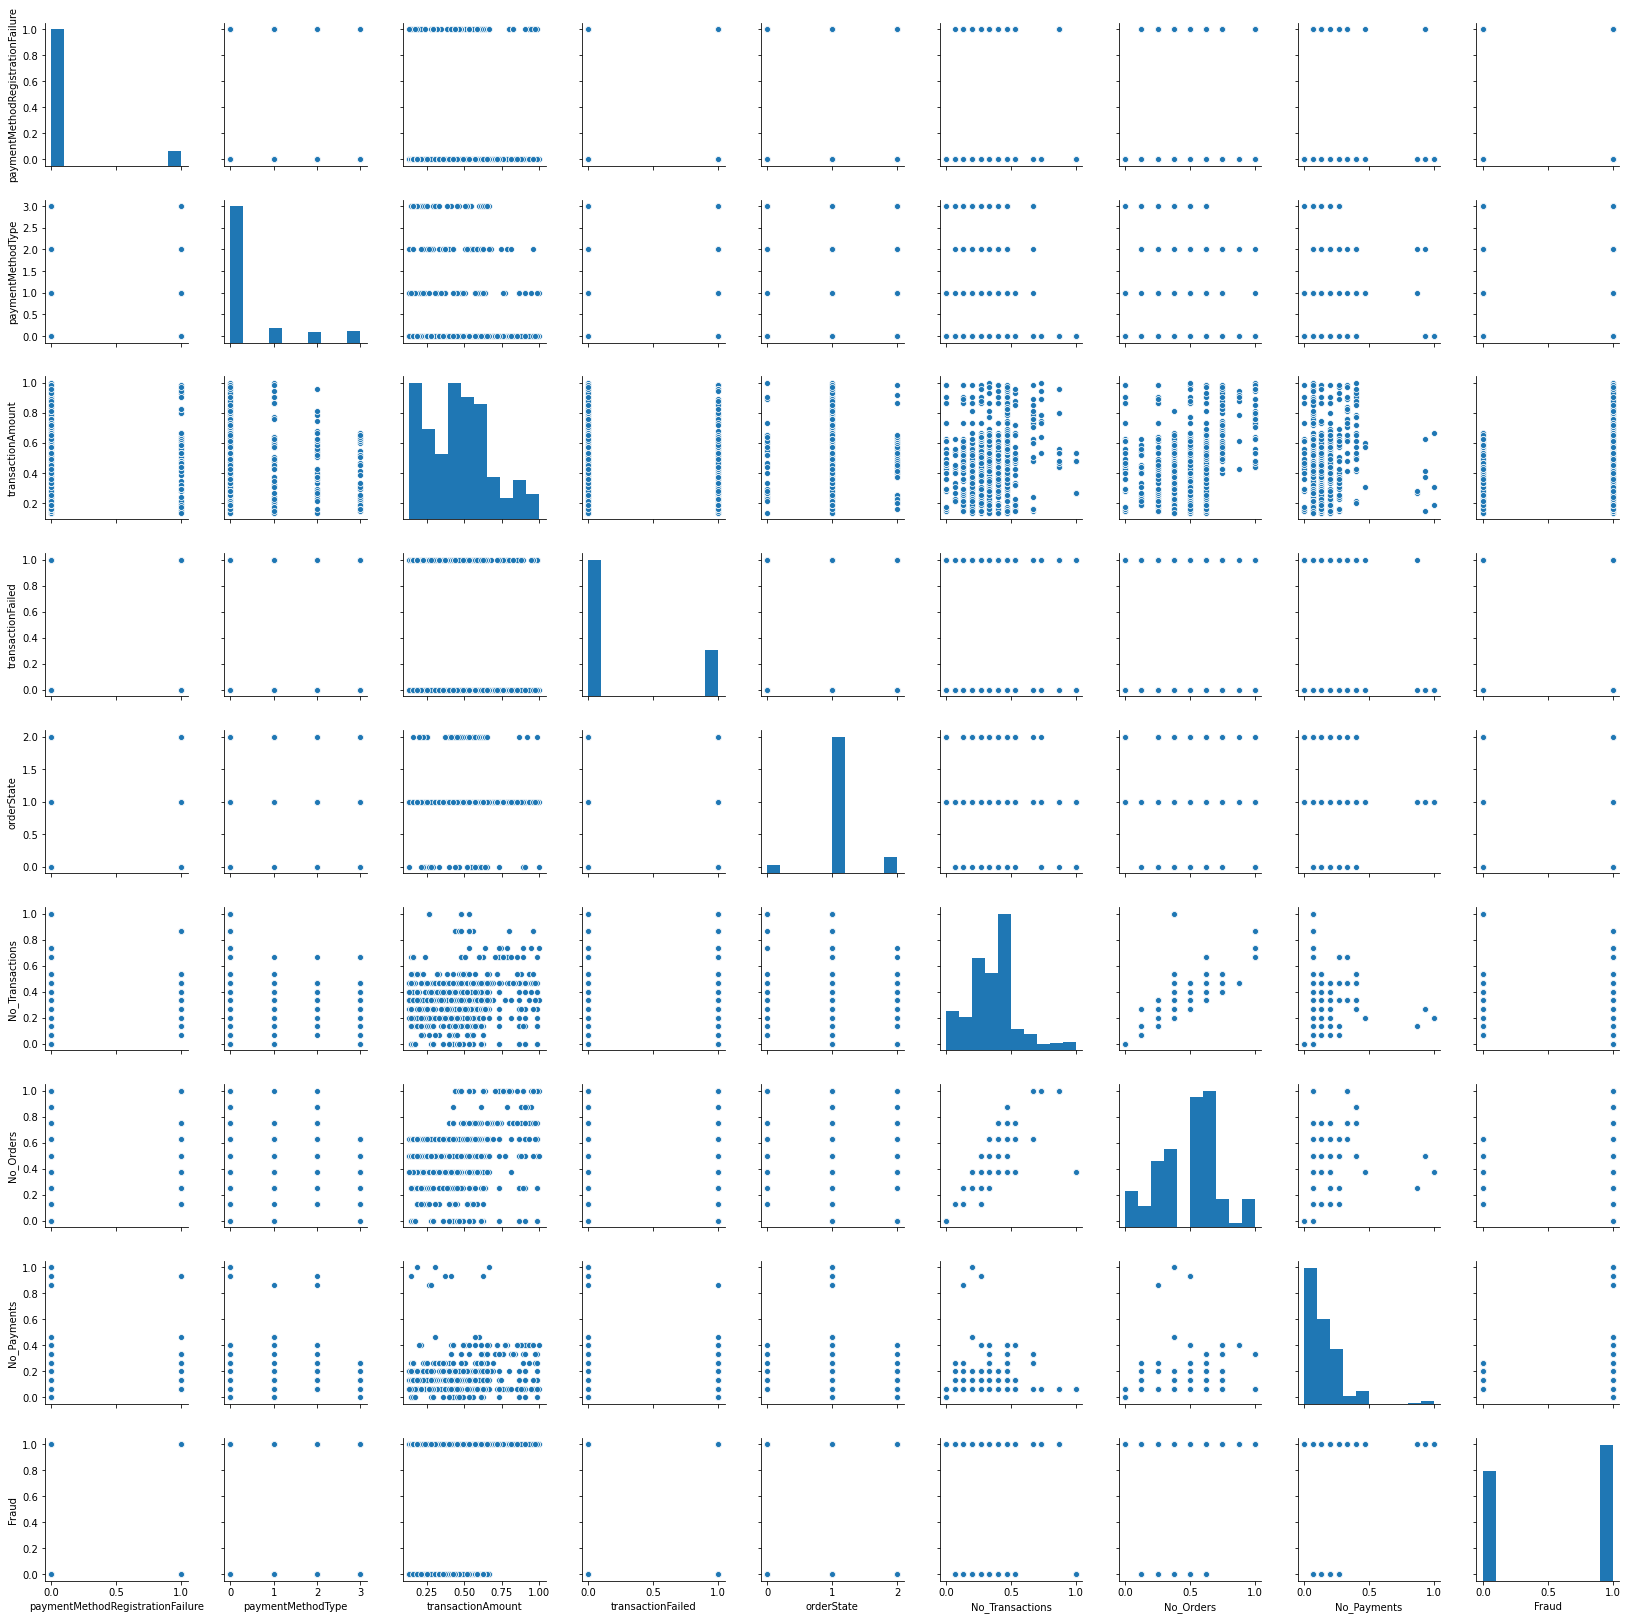

In [402]:
sns.pairplot(df3)

,paymentMethodRegistrationFailure,paymentMethodType,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,Fraud
paymentMethodRegistrationFailure,1.000000,-0.010156,0.041677,0.009789,-0.020841,0.134583,0.147246,-0.022387,-0.068034
paymentMethodType,-0.010156,1.000000,0.001530,-0.033896,-0.014913,-0.063382,0.001737,0.021569,-0.137535
transactionAmount,0.041677,0.001530,1.000000,-0.026606,0.022630,0.123582,0.255754,0.080892,0.317392
transactionFailed,0.009789,-0.033896,-0.026606,1.000000,-0.051555,0.195882,0.002026,-0.035597,-0.081663
orderState,-0.020841,-0.014913,0.022630,-0.051555,1.000000,-0.123718,0.002557,-0.019221,0.087044
No_Transactions,0.134583,-0.063382,0.123582,0.195882,-0.123718,1.000000,0.775721,0.134956,-0.061135
No_Orders,0.147246,0.001737,0.255754,0.002026,0.002557,0.775721,1.000000,0.294477,0.109586
No_Payments,-0.022387,0.021569,0.080892,-0.035597,-0.019221,0.134956,0.294477,1.000000,0.142939
Fraud,-0.068034,-0.137535,0.317392,-0.081663,0.087044,-0.061135,0.109586,0.142939,1.000000


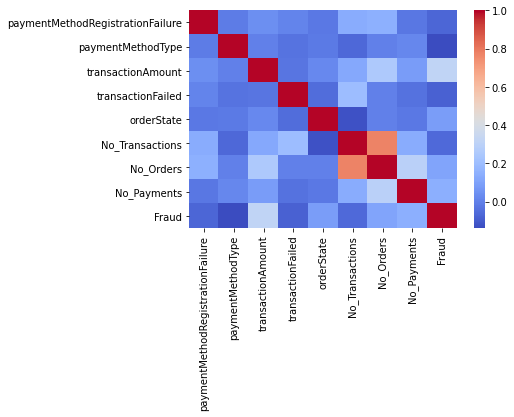

In [403]:
cor=df3.corr()
sns.heatmap(cor,cmap="coolwarm")
cor


Here we see that the columns of dataframe i.e. No_Transactions ,transactionFailed ,paymentMethodType ,paymentMethodRegistrationFailure are less correlated with fraud column and thus not contribute to our model accuracy.

In [0]:
# therefore removing
# all above columns 

lis=["No_Transactions","transactionFailed","paymentMethodType","paymentMethodRegistrationFailure",""]

for i in lis:
  df3=df3.drop([i],axis=1)

,transactionAmount,orderState,No_Orders,No_Payments,Fraud
transactionAmount,1.000000,0.022630,0.255754,0.080892,0.317392
orderState,0.022630,1.000000,0.002557,-0.019221,0.087044
No_Orders,0.255754,0.002557,1.000000,0.294477,0.109586
No_Payments,0.080892,-0.019221,0.294477,1.000000,0.142939
Fraud,0.317392,0.087044,0.109586,0.142939,1.000000


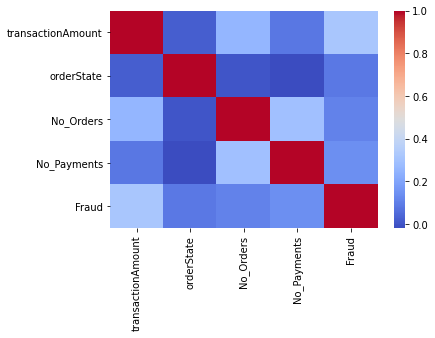

In [460]:
sns.heatmap(df3.corr(),cmap="coolwarm")
df3.corr()

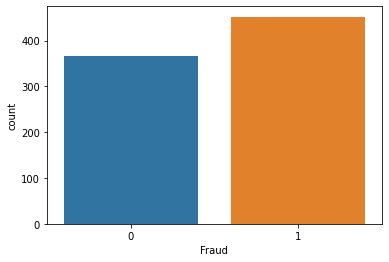

In [768]:
sns.countplot(df3["Fraud"])

(array([366.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 452.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

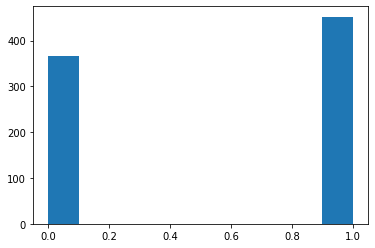

In [405]:
plt.hist(df3["Fraud"])

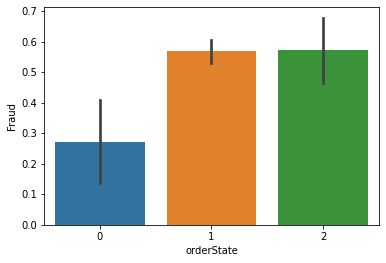

In [406]:

sns.barplot(df3["orderState"],df3["Fraud"])

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f963c911b70>,
      dtype=object)

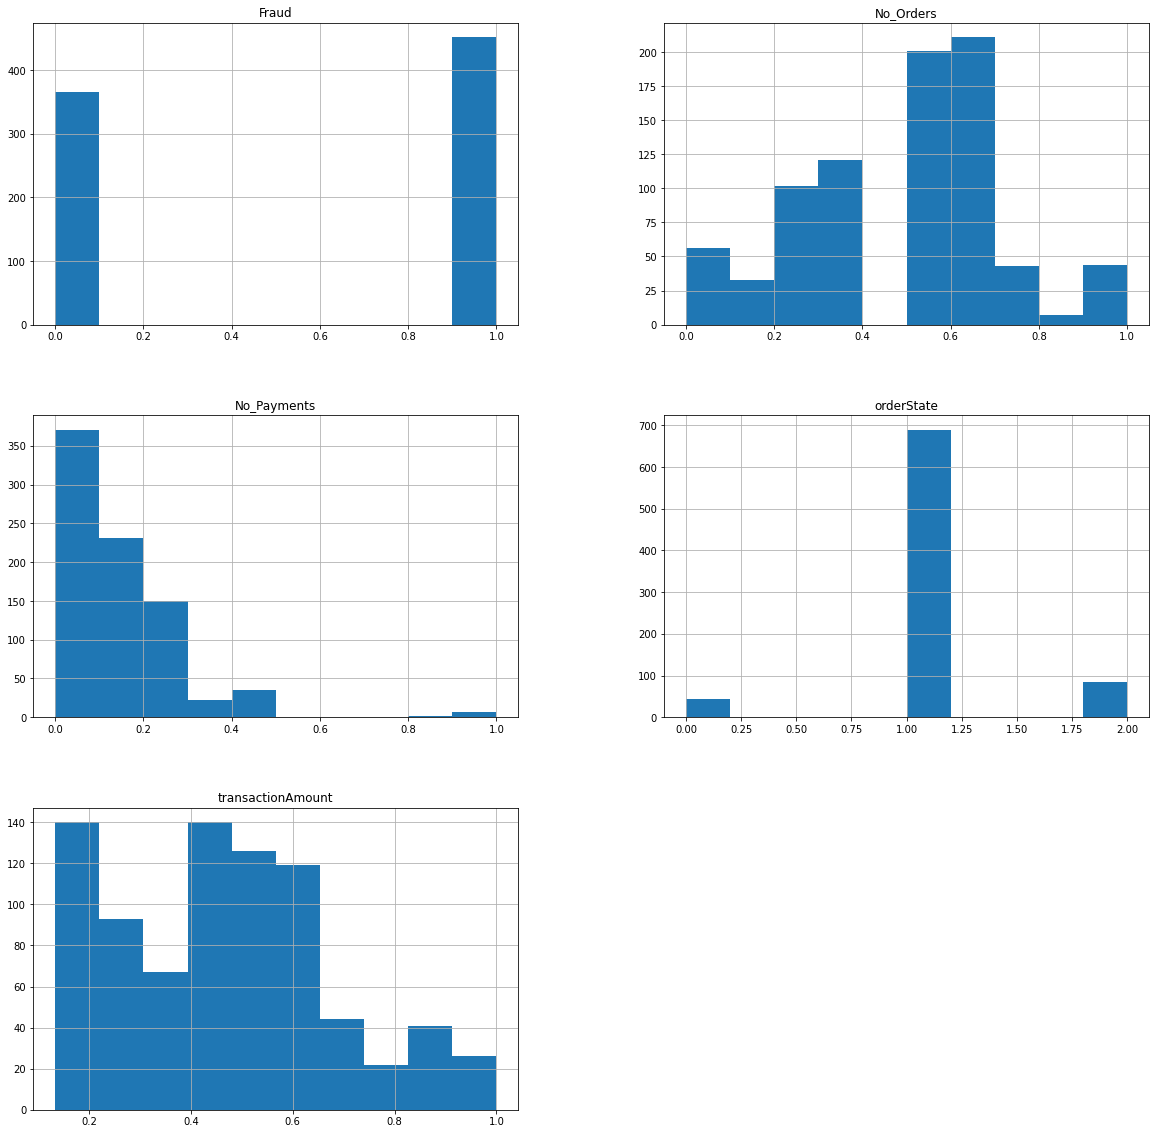

In [409]:
df3.hist(figsize=(20,20))

**FRAUD DETECTION WITH ML MODELS**
**i.e. TRAINING AND TESTING WITH ML MODELS**

In [0]:
x=df3.iloc[:,0:4]
y=df3.iloc[:,4:5]
from sklearn.model_selection import train_test_split

In [746]:
x.head()

,transactionAmount,orderState,No_Orders,No_Payments
0,0.240000,0,0.250,0.066667
1,0.346667,1,0.250,0.066667
2,0.600000,1,0.375,0.466667
3,0.306667,1,0.375,0.466667
4,0.573333,1,0.375,0.466667


In [747]:
y.head()

,Fraud
0,0
1,0
2,1
3,1
4,1


In [0]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [0]:
x_train=sc.fit_transform(x_train)
x_val=sc.transform(x_val)

In [750]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

71.34


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [751]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

63.41


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [752]:
from sklearn.svm import SVC

svc = SVC(gamma="auto")
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

69.51


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [753]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

63.41


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [765]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

85.37


In [763]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=35)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.54


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [756]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

77.44


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [757]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

63.41


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [758]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
acc_gbc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbc)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


81.1


In [766]:
# confusion_matrix for
# decisiontreeclassifier

from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_val)



array([[62, 14],
       [10, 78]])

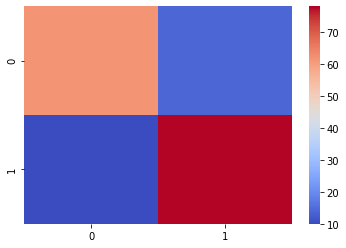

In [767]:
sns.heatmap(confusion_matrix(y_pred,y_val),cmap="coolwarm")

**FROM ABOVE ALL TRAINED MODELS WE OBSERVE THAT DecisionTreeClassifier WORKS BETTER IN TERMS OF ACCURACY WITH ACCURACY OF 85.37%**